In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.initializers import HeNormal

<h1>1. Модель ИНС для аппроксимации нелинейной функции одного аргумента.</h1>

In [8]:
def create_sequential_single_input(layers, neurons, activation_func_name):
    nn = Sequential()
    nn.add(Input(shape=(1,)))
    for i in range(layers):
        nn.add(Dense(units=neurons[i], activation=activation_func_name))
    nn.add(Dense(units=1))
    return nn

<h3>Сгенерируем данные для опробации и обучения для функции одной переменной y=sin(x)</h3>

In [9]:
np.random.seed(0)
x_train = np.random.uniform(low=0, high=2*np.pi, size=1000)
x_test = np.random.uniform(low=0, high=2*np.pi, size=200)

y_train = np.sin(x_train)
y_test = np.sin(x_test)

def train_model(model, x_train, x_test, y_train, y_test, batch_size=5, epochs=100):
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mse'])
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test),
              verbose=1)
    return model


In [10]:
first_model = create_sequential_single_input(1, [4], 'sigmoid')
trained_first_model = train_model(first_model, x_train, x_test, y_train, y_test)

Epoch 1/100


200/200 [==============================] - 2s 5ms/step - loss: 0.7311 - mse: 0.7311 - val_loss: 0.4937 - val_mse: 0.4937
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4248 - mse: 0.4248 - val_loss: 0.3451 - val_mse: 0.3451
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3213 - mse: 0.3213 - val_loss: 0.2830 - val_mse: 0.2830
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.2711 - mse: 0.2711 - val_loss: 0.2495 - val_mse: 0.2495
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.2364 - mse: 0.2364 - val_loss: 0.2267 - val_mse: 0.2267
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.2121 - mse: 0.2121 - val_loss: 0.2119 - val_mse: 0.2119
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.1969 - mse: 0.1969 - val_loss: 0.2049 - val_mse: 0.2049
Epoch 8/100
200/200 [==============================] - 1s 3ms/step - loss: 0.1861

7/7 [==============================] - 0s 3ms/step - loss: 0.0547 - mse: 0.0547
Loss = 0.05468916893005371, MSE = 0.05468916893005371
7/7 [==============================] - 0s 2ms/step
[-0.76091623 -0.760818   -0.7604189  -0.7602627  -0.7601888  -0.75962424
 -0.7591915  -0.7590451  -0.7590225  -0.75889754 -0.7588482  -0.75863385
 -0.75806403 -0.7580106  -0.7578261  -0.7572975  -0.75722027 -0.7568674
 -0.7567792  -0.756526   -0.75493765 -0.7547529  -0.7543807  -0.75409317
 -0.7524643  -0.7521484  -0.75121    -0.7484939  -0.74675393 -0.7454152
 -0.74201536 -0.740319   -0.73966646 -0.7378216  -0.7373445  -0.7361648
 -0.72842336 -0.7278538  -0.72651434 -0.72316384 -0.72306323 -0.71497416
 -0.7141113  -0.7101469  -0.709831   -0.7050221  -0.70169306 -0.69914174
 -0.687737   -0.6844766  -0.68311787 -0.6812823  -0.660558   -0.6595292
 -0.6519003  -0.6509507  -0.6462579  -0.6389117  -0.6366508  -0.6360967
 -0.6343255  -0.62926173 -0.62476873 -0.6170759  -0.6062467  -0.58268213
 -0.57689285 -0.5

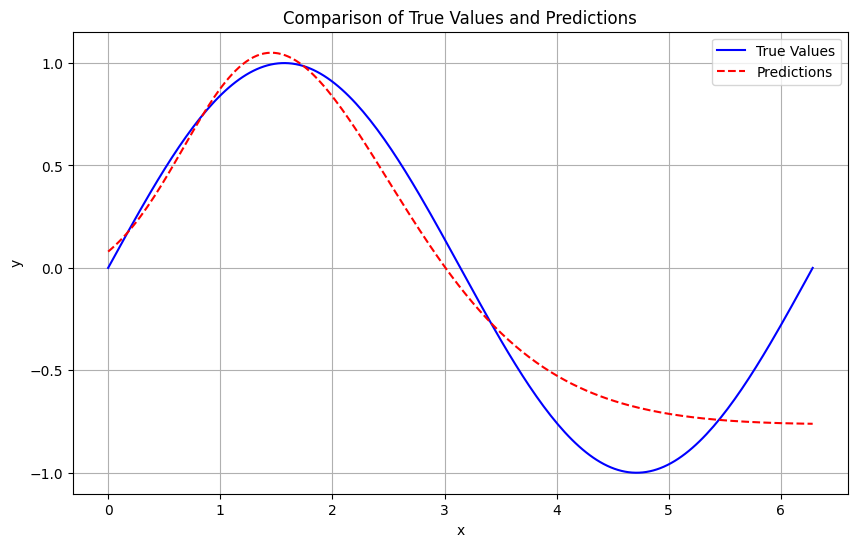

In [11]:
def test_model(model, x_test, y_test, graph=True):
    loss, mse = model.evaluate(x_test, y_test)
    print(f"Loss = {loss}, MSE = {mse}")
    predictions = model.predict(x_test)
    print(np.unique(predictions))
    # for i in range(len(predictions)):
    #     print(f"Sample {i}: True Value = {y_test[i]}, Prediction = {predictions[i][0]}")
     

    if graph:
        x_test_distribution = np.linspace(0, 2*np.pi, 200)
        #print(x_test_distribution)
        y_test_true_distribution = np.sin(x_test_distribution)
        #print(y_test_true_distribution)      
        predictions_destribution = model.predict(x_test_distribution)
        #print(predictions_destribution) 
        plt.figure(figsize=(10, 6))
        plt.plot(x_test_distribution, y_test_true_distribution, label='True Values', color='blue', linestyle='-', marker=None)
        plt.plot(x_test_distribution, predictions_destribution, label='Predictions', color='red', linestyle='--', marker=None)
        plt.title('Comparison of True Values and Predictions')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True)
        plt.show()

test_model(first_model, x_test, y_test)

<h3>Для функции активации sigmoid наилучшего результата аппроксимации(по mse и визуальной оценке графика аппроксимации) значения функции y=sin(x) удалось добиться с помощью модели с одним слоем и 4 нейронами</h3>

Epoch 1/100
200/200 [==============================] - 2s 6ms/step - loss: 0.2433 - mse: 0.2433 - val_loss: 0.1733 - val_mse: 0.1733
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.1614 - mse: 0.1614 - val_loss: 0.1849 - val_mse: 0.1849
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.1508 - mse: 0.1508 - val_loss: 0.1522 - val_mse: 0.1522
Epoch 4/100
200/200 [==============================] - 1s 5ms/step - loss: 0.1447 - mse: 0.1447 - val_loss: 0.1560 - val_mse: 0.1560
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.1330 - mse: 0.1330 - val_loss: 0.1412 - val_mse: 0.1412
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.1218 - mse: 0.1218 - val_loss: 0.1347 - val_mse: 0.1347
Epoch 7/100
200/200 [==============================] - 1s 5ms/step - loss: 0.1109 - mse: 0.1109 - val_loss: 0.1157 - val_mse: 0.1157
Epoch 8/100
200/200 [==============================] - 1s 5ms/step - 

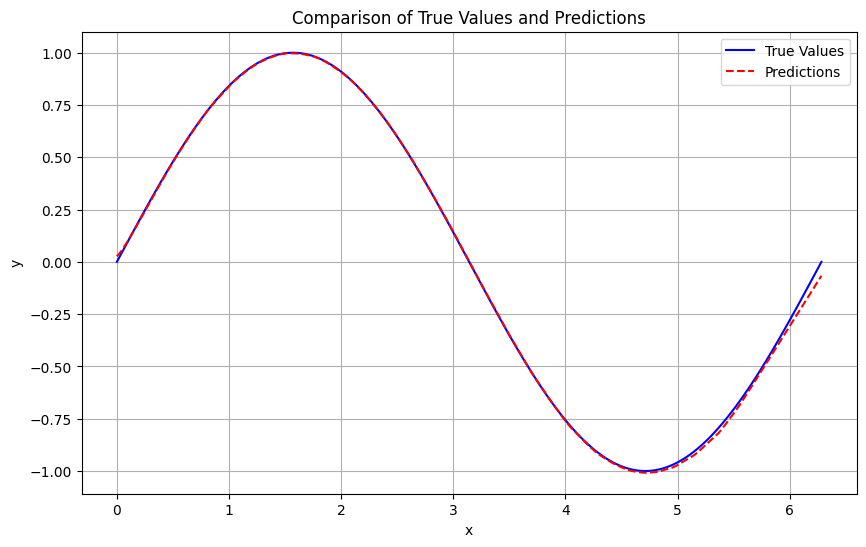

In [12]:
second_model = create_sequential_single_input(3, [256, 256, 256], 'relu')
trained_second_model = train_model(second_model, x_train, x_test, y_train, y_test)
test_model(trained_second_model, x_test, y_test)

<h3>При использовании функции активации relu до определенного момента увеличение количества нейронов на каждом  из слоев приводило к улучшению точности аппроксимации. Наилучшего результата смогла добиться модель с 3-мя слоями и 256 нейронами на каждом слое.</h3>

Epoch 1/100
200/200 [==============================] - 2s 5ms/step - loss: 0.3304 - mse: 0.3304 - val_loss: 0.2712 - val_mse: 0.2712
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.2049 - mse: 0.2049 - val_loss: 0.2390 - val_mse: 0.2390
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.1788 - mse: 0.1788 - val_loss: 0.2450 - val_mse: 0.2450
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.1515 - val_mse: 0.1515
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.1286 - mse: 0.1286 - val_loss: 0.1107 - val_mse: 0.1107
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.1271 - mse: 0.1271 - val_loss: 0.1105 - val_mse: 0.1105
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.1005 - mse: 0.1005 - val_loss: 0.1098 - val_mse: 0.1098
Epoch 8/100
200/200 [==============================] - 1s 4ms/step - 

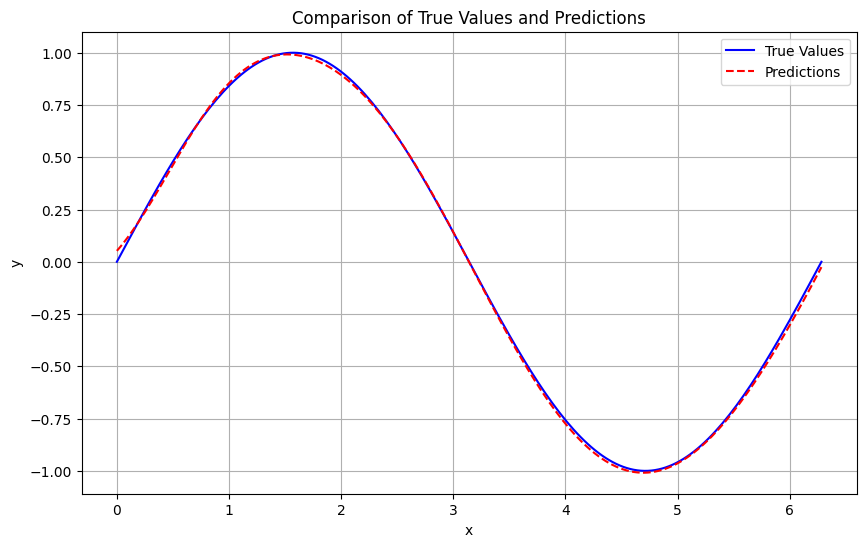

In [13]:
third_model = create_sequential_single_input(3, [256, 256, 256], 'tanh')
trained_third_model = train_model(third_model, x_train, x_test, y_train, y_test)
test_model(trained_third_model, x_test, y_test)

<h3>Поведение модели, при обучении которой использовалась функция активации tanh, похоже на вариант с relu. Наилучшего результата смогла добиться модель с 3-мя слоями и 256 нейронами на каждом слое.</h3>

<h1>2. Модель ИНС для регрессии на реальном наборе данных</h1>

<h3>Подготовим данные для обучения</h3>

In [14]:
df = pd.read_csv('audi.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [15]:

binarised_df = df.drop(columns=['model', 'transmission', 'fuelType'])
binarised_df

,year,price,mileage,tax,mpg,engineSize
0,2017,12500,15735,150,55.4,1.4
1,2016,16500,36203,20,64.2,2.0
2,2016,11000,29946,30,55.4,1.4
3,2017,16800,25952,145,67.3,2.0
4,2019,17300,1998,145,49.6,1.0
...,...,...,...,...,...,...
10663,2020,16999,4018,145,49.6,1.0
10664,2020,16999,1978,150,49.6,1.0
10665,2020,17199,609,150,49.6,1.0
10666,2017,19499,8646,150,47.9,1.4


<h3>Пропусков в данных нет(я гений просчитал на несколько месяцев вперед!!!!!!)</h3>

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Выделение признаков и целевой переменной
X = df.drop('price', axis=1)
y = df['price']

# Определение числовых и категориальных столбцов
num_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
cat_features = ['model', 'transmission', 'fuelType']

# Создание трансформеров для предобработки
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

# Предобработка данных
X_processed = preprocessor.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.05, random_state=20)

X_train.shape, X_test.shape

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Преобразование разреженной матрицы в NumPy массив
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Разделение обучающей выборки на обучающую и валидационную
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_dense, y_train, test_size=0.2, random_state=42)

# Создание модели
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_final.shape[1],)),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(1)  # Выходной слой для предсказания цены
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(X_train_final, y_train_final, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=1)

# Оценка модели на тестовых данных
test_loss = model.evaluate(X_test_dense, y_test, verbose=1)
print(f'Test loss: {np.sqrt(test_loss)}')

Epoch 1/100
254/254 [==============================] - 5s 12ms/step - loss: 160082112.0000 - val_loss: 17191152.0000
Epoch 2/100
254/254 [==============================] - 2s 8ms/step - loss: 16278207.0000 - val_loss: 12766257.0000
Epoch 3/100
254/254 [==============================] - 2s 8ms/step - loss: 12219028.0000 - val_loss: 10350982.0000
Epoch 4/100
254/254 [==============================] - 2s 8ms/step - loss: 10232677.0000 - val_loss: 9441139.0000
Epoch 5/100
254/254 [==============================] - 2s 8ms/step - loss: 9124022.0000 - val_loss: 8483624.0000
Epoch 6/100
254/254 [==============================] - 2s 9ms/step - loss: 8475733.0000 - val_loss: 7953477.0000
Epoch 7/100
254/254 [==============================] - 2s 9ms/step - loss: 8082782.5000 - val_loss: 8879293.0000
Epoch 8/100
254/254 [==============================] - 2s 8ms/step - loss: 7741943.5000 - val_loss: 7377141.5000
Epoch 9/100
254/254 [==============================] - 2s 8ms/step - loss: 7557447.0000

In [17]:
predictions = model.predict(X_test_dense)
y_test = y_test.tolist()
for i in range(len(predictions)):
        print(f"Sample {i}: True Value = {y_test[i]}, Prediction = {predictions[i]}")

17/17 [==============================] - 0s 3ms/step
Sample 0: True Value = 26500, Prediction = [28021.05]
Sample 1: True Value = 54950, Prediction = [48001.28]
Sample 2: True Value = 28000, Prediction = [27421.65]
Sample 3: True Value = 9390, Prediction = [8499.623]
Sample 4: True Value = 21374, Prediction = [21653.014]
Sample 5: True Value = 28995, Prediction = [26715.03]
Sample 6: True Value = 14498, Prediction = [12341.91]
Sample 7: True Value = 19990, Prediction = [18898.502]
Sample 8: True Value = 25000, Prediction = [24840.498]
Sample 9: True Value = 28990, Prediction = [26317.885]
Sample 10: True Value = 20691, Prediction = [21050.584]
Sample 11: True Value = 25495, Prediction = [23547.307]
Sample 12: True Value = 36000, Prediction = [36150.953]
Sample 13: True Value = 7900, Prediction = [6638.708]
Sample 14: True Value = 12000, Prediction = [11581.243]
Sample 15: True Value = 19998, Prediction = [19660.63]
Sample 16: True Value = 10895, Prediction = [10787.434]
Sample 17: True

<h3>Средняя ошибка составила 2583, в то время, как на средняя ошибка в модели на основе дерева решений составила 1706, на основе полиноминальной регрессии 1845, на основе 2577, на основе случайного леса - 1506. Как мы видим модели труднее всего прогнозировать цену у автомобилей, с ценой, близкой к средней.</h3>

<h1>3. Модель ИНС для классификации</h1>

In [4]:
data_path = 'Emotion_classify_Data.csv'
data = pd.read_csv(data_path)
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


(None,
                                              Comment Emotion
 0  i seriously hate one subject to death but now ...    fear
 1                 im so full of life i feel appalled   anger
 2  i sit here to write i start to dig out my feel...    fear
 3  ive been really angry with r and i feel like a...     joy
 4  i feel suspicious if there is no one outside l...    fear)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

category_counts = data['Emotion'].value_counts()

data['Comment'] = data['Comment'].str.lower()

label_encoder = LabelEncoder()
data['Emotion_encoded'] = label_encoder.fit_transform(data['Emotion'])

X_train, X_test, y_train, y_test = train_test_split(data['Comment'], data['Emotion_encoded'], test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

category_counts, label_encoder.classes_

(Emotion
 anger    2000
 joy      2000
 fear     1937
 Name: count, dtype: int64,
 array(['anger', 'fear', 'joy'], dtype=object),
 <4749x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 28053 stored elements in Compressed Sparse Row format>)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer

In [9]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
from sklearn.model_selection import train_test_split

X_train_tfidf_train, X_train_tfidf_val, y_train_train, y_train_val = train_test_split(X_train_tfidf, y_train, test_size=0.1, random_state=42)

X_train_tfidf_train_dense = X_train_tfidf_train.toarray()
X_train_tfidf_val_dense = X_train_tfidf_val.toarray()

history = model.fit(X_train_tfidf_train_dense, y_train_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_train_tfidf_val_dense, y_train_val),
                    verbose=1)

Epoch 1/10


134/134 [==============================] - 2s 10ms/step - loss: 0.6279 - accuracy: 0.7581 - val_loss: 0.2323 - val_accuracy: 0.9137
Epoch 2/10
134/134 [==============================] - 1s 8ms/step - loss: 0.1149 - accuracy: 0.9626 - val_loss: 0.2477 - val_accuracy: 0.9200
Epoch 3/10
134/134 [==============================] - 1s 8ms/step - loss: 0.0465 - accuracy: 0.9876 - val_loss: 0.2687 - val_accuracy: 0.9179
Epoch 4/10
134/134 [==============================] - 1s 8ms/step - loss: 0.0251 - accuracy: 0.9942 - val_loss: 0.2865 - val_accuracy: 0.9200
Epoch 5/10
134/134 [==============================] - 1s 8ms/step - loss: 0.0183 - accuracy: 0.9944 - val_loss: 0.2996 - val_accuracy: 0.9095
Epoch 6/10
134/134 [==============================] - 1s 8ms/step - loss: 0.0164 - accuracy: 0.9949 - val_loss: 0.3480 - val_accuracy: 0.9179
Epoch 7/10
134/134 [==============================] - 1s 8ms/step - loss: 0.0148 - accuracy: 0.9958 - val_loss: 0.2956 - val_accuracy: 0.9179
Epo

In [22]:
X_test_tfidf_dense = X_test_tfidf.toarray()

loss, accuracy = model.evaluate(X_test_tfidf_dense, y_test, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

predicted_class_indices = np.argmax(predictions, axis=1)

predicted_classes = label_encoder.inverse_transform(predicted_class_indices)

for comment, prediction in zip(X_test, predicted_classes):
    print(f"Comment: {comment}\nPredicted Emotion: {prediction}\n")

Test Accuracy: 91.16%
Comment: i do give up at times when i feel there s no point in a friendship when one cant be bothered
Predicted Emotion: anger

Comment: im a firm believer that nothing makes a woman feel much more terrific than a great trip to the salon to lift her spirits a bit
Predicted Emotion: joy

Comment: i was feeling very vulnerable and down no one really close to me has ever died before i either hadnt known them very well or was too young to remember
Predicted Emotion: fear

Comment: i closed her eyes in anger and feeling disgusted by this touch
Predicted Emotion: anger

Comment: i feel like being distracted
Predicted Emotion: anger

Comment: i just feel shy because i was just a sharia stream student who is now still struggling with european union policy and decision making thesis while those uncles there discussing trillion dollars projects in government lead companies glc
Predicted Emotion: fear

Comment: i want to talk to you about but with the limited time we have on